In [77]:
from datasets import load_dataset, load_dataset_builder
from torch.utils.data import DataLoader
import torch
import numpy as np

#### huggingface datasets

In [11]:
name = 'fashion_mnist'
ds_builder = load_dataset_builder(name)

In [12]:
print(ds_builder.info.description)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of
60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in
replacement for the original MNIST dataset for benchmarking machine learning algorithms.
It shares the same image size and structure of training and testing splits.



In [13]:
ds_builder.info.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [14]:
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31296655, num_examples=60000, shard_lengths=None, dataset_name=None),
 'test': SplitInfo(name='test', num_bytes=5233818, num_examples=10000, shard_lengths=None, dataset_name=None)}

In [15]:
dsd = load_dataset(name)

Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /Users/arun/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/8d6c32399aa01613d96e2cbc9b13638f359ef62bb33612b077b4c247f6ef99c1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
dsd

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [17]:
train,test = dsd['train'], dsd['test']

In [19]:
x, y = ds_builder.info.features

In [21]:
x, y

('image', 'label')

In [22]:
x, y = 'image', 'label'
train[0][x]

In [30]:
train.features[y]

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [31]:
featy = train.features[y]

In [32]:
featy

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [33]:
yb = train[:5]['label']

In [34]:
yb

[9, 0, 0, 3, 0]

In [36]:
featy.str2int(featy.int2str(yb))

[9, 0, 0, 3, 0]

In [38]:
DataLoader??

In [97]:
# x = np.randint(1000, size=(2, 3))
x = np.random.random_sample((2,3))

In [98]:
x

array([[0.9697483 , 0.41876137, 0.08409762],
       [0.63605053, 0.9717233 , 0.00669907]])

In [99]:
x.ndim

2

In [100]:
x = x[:, :,None]

In [101]:
x.shape

(2, 3, 1)

In [102]:
x.transpose((2, 0, 1))

array([[[0.9697483 , 0.41876137, 0.08409762],
        [0.63605053, 0.9717233 , 0.00669907]]])

In [103]:
x = x.transpose((2, 0, 1))

In [104]:
torch.from_numpy(x)

tensor([[[0.9697, 0.4188, 0.0841],
         [0.6361, 0.9717, 0.0067]]], dtype=torch.float64)

In [106]:
if isinstance(x, torch.ByteTensor):
    print('hey')

In [111]:
torch.ByteTensor??

In [113]:
y = torch.ByteTensor([0, 1, 1, 0])

In [114]:
isinstance(y, torch.ByteTensor)

True

In [116]:
y.to(dtype=torch.get_default_dtype()).div(255)

tensor([0.0000, 0.0039, 0.0039, 0.0000])

In [118]:
y

tensor([0, 1, 1, 0], dtype=torch.uint8)

In [119]:
y.to(dtype=torch.get_default_dtype())

tensor([0., 1., 1., 0.])

In [122]:
import numpy as np

# create a 2x2 RGB image with random pixel values
pic = np.random.randint(low=0, high=256, size=(2, 2, 3), dtype=np.uint8)

pic


array([[[ 47, 237, 216],
        [156, 229, 136]],

       [[207,  92,  33],
        [151,  85, 184]]], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


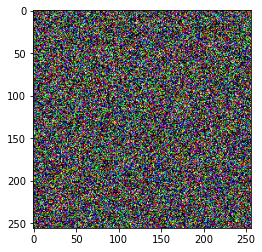

In [124]:
import matplotlib.pyplot as plt

# Assuming img is a tensor of shape (3, height, width)
img = torch.randn(3, 256, 256)

# Convert the tensor to a numpy array and transpose the dimensions
img_np = img.numpy().transpose(1, 2, 0)

# Display the image using matplotlib
plt.imshow(img_np)
plt.show()


In [140]:
img_np.shape

(256, 256, 3)

In [142]:
img_np[0, 0]

array([-1.0193948 ,  0.6852405 , -0.02709145], dtype=float32)

In [150]:
img

tensor([[[-1.0194,  0.4477,  0.7602,  ..., -0.3230,  0.5835,  0.5112],
         [-0.0669,  1.0120, -0.8929,  ..., -0.4902,  0.8324,  0.7410],
         [ 0.1752, -0.4802, -1.7776,  ...,  0.2475,  1.9666, -1.1928],
         ...,
         [ 0.6295, -0.6342, -0.0509,  ..., -0.4624,  1.7891,  2.3786],
         [ 0.4772,  1.0982,  0.5794,  ..., -0.5571,  0.2279,  0.6752],
         [-0.9090, -0.2376, -0.3753,  ...,  1.2722, -0.4530, -0.5079]],

        [[ 0.6852,  0.7782,  0.6931,  ..., -1.1212,  0.5114,  0.2446],
         [-1.1702,  1.7475,  0.0570,  ...,  0.7599,  0.4233, -0.9641],
         [-0.8196, -0.2080, -0.2236,  ...,  0.4472,  0.1364, -1.4184],
         ...,
         [ 0.7701, -1.3168,  0.4256,  ..., -2.0118,  0.2758,  0.8026],
         [ 0.3216, -0.9410, -0.2024,  ..., -0.0552,  0.2765, -0.7098],
         [ 1.4510, -0.2302,  0.3885,  ...,  0.5079,  0.3018, -0.3680]],

        [[-0.0271, -0.1304,  0.1290,  ..., -0.1650, -0.9431, -1.5953],
         [ 0.3444, -0.3198, -0.5747,  ...,  1